In [19]:
import itertools
import time

import mujoco
import mediapy as media

import numpy as np
import matplotlib.pyplot as plt

In [20]:
model = mujoco.MjModel.from_xml_path("./model/stanford_tidybot/scene.xml")
data = mujoco.MjData(model)

In [32]:
cam = mujoco.MjvCamera()
cam

<MjvCamera
  azimuth: 90.0
  distance: 2.0
  elevation: -45.0
  fixedcamid: -1
  lookat: array([0., 0., 0.])
  orthographic: 0
  trackbodyid: -1
  type: 0
>

""

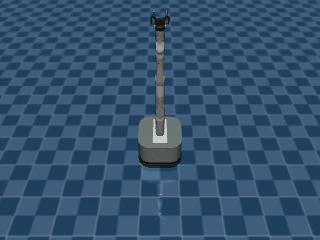

In [ ]:
cam.distance = 3.0
cam.elevation = -45.0
cam.lookat = np.array([0, 0, 0.5])

with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data)
    renderer.update_scene(data, cam)
    
    media.show_image(renderer.render())

In [73]:
data.ctrl

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 3.01])

In [75]:
duration = 5.0  # (seconds)
framerate = 60  # (Hz)

cam.distance = 3.0
cam.elevation = -45.0
cam.lookat = np.array([0, 0, 0.5])

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, cam)

            # data.ctrl[0] += 0.005  # joint_x
            # data.ctrl[1] += 0.005  # joint_y
            # data.ctrl[2] += 0.005  # joint_th
            # data.ctrl[3] += 0.005  # joint_1
            # data.ctrl[4] += 0.005  # joint_2
            # data.ctrl[5] += 0.005  # joint_3
            # data.ctrl[6] += 0.005  # joint_4
            # data.ctrl[7] += 0.005  # joint_5
            # data.ctrl[8] += 0.005  # joint_6
            # data.ctrl[9] += 0.005  # joint_7
            data.ctrl[10] += 0.1  # fingers_actuator

            mujoco.mj_forward(model, data)

            pixels = renderer.render()
            frames.append(pixels)

media.show_video(frames, fps=framerate)